In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [2]:
df_native = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAz_Excel/native.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAz_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAz_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAz_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAz_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAz_Excel/alifoldz.xlsx"))

In [3]:
# df_native = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/sissi.xlsx"))
# df_sissiz_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/sissiz_mono.xlsx"))
# df_sissiz_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/sissiz_di.xlsx"))
# df_multiperm_mono = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/multiperm_mono.xlsx"))
# df_multiperm_di = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/multiperm_di.xlsx"))
# df_aln_shuffle = pd.DataFrame(pd.read_excel("C:/bla/Waste/MA/Data/RNAz_Data_di_Excel/alifoldz.xlsx"))

In [4]:
new_df_native = df_native.drop(['Sequences', 'Columns'], axis=1)
new_df_native.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,56.58,0.96904,0.61108,-54.69,-28.07,-19.23,-8.84,4.35,-7.10,0.51,5.15,0.999951,ar14.txt
1,67.01,0.78841,0.52635,-43.27,-21.88,-18.38,-3.50,2.75,-4.30,0.51,6.00,0.999990,ar15.txt
2,76.52,0.42946,0.52794,-57.22,-54.56,-49.76,-4.80,1.49,-2.89,0.95,3.24,0.998048,ar35.txt
3,85.25,0.33144,0.57011,-70.52,-62.22,-57.39,-4.82,1.58,-1.75,0.88,1.75,0.966488,ar45.txt
4,59.89,0.85426,0.62349,-70.16,-52.64,-44.55,-8.09,2.23,-6.69,0.75,3.63,0.999080,ar7.txt
5,73.23,0.53446,0.48667,-55.89,-41.91,-37.03,-4.88,1.62,-3.58,0.75,4.38,0.999783,ar9.txt
6,48.68,0.86380,0.54253,-155.60,0.00,0.00,0.00,0.00,-32.66,-0.00,3.73,0.999232,HOTAIR_D1.txt
7,85.00,0.38238,0.51493,-16.94,-3.70,-3.74,0.05,1.50,-0.51,0.22,-5.92,0.000011,HOTAIR_D1_H10_compact.txt
8,74.75,0.49466,0.59389,-9.54,0.00,0.00,0.00,0.00,-0.79,-0.00,-6.82,0.000002,HOTAIR_D1_H7_compact.txt
9,66.03,0.64314,0.54386,-184.30,-13.54,-13.37,-0.18,1.85,-39.73,0.07,3.35,0.998424,HOTAIR_D2.txt


In [5]:
new_df_native[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,65.176129,0.701620,0.489580,-77.373226,-23.990968,-21.360000,-2.630645,2.216452,-17.372258,0.384839,2.009032,0.815244
std,10.415884,0.197371,0.078794,67.848486,24.278216,23.915753,3.131013,1.679126,20.952425,0.300953,3.353196,0.370585
min,48.680000,0.331440,0.351880,-303.570000,-65.040000,-65.070000,-11.360000,0.000000,-66.110000,-0.000000,-6.820000,0.000002
25%,56.450000,0.588260,0.429350,-118.520000,-47.275000,-40.790000,-4.450000,1.380000,-42.160000,0.090000,1.410000,0.926386
50%,66.850000,0.668660,0.486670,-55.890000,-12.190000,-8.900000,-1.680000,1.770000,-3.580000,0.380000,3.520000,0.998847
75%,70.920000,0.857095,0.543195,-25.330000,-5.025000,-3.845000,0.000000,3.880000,-1.545000,0.550000,3.715000,0.999213
max,85.250000,1.094510,0.647000,-8.130000,0.000000,0.000000,0.050000,5.360000,-0.510000,0.950000,6.000000,0.999990


In [6]:
new_df_sissiz_mono = df_sissiz_mono.drop(['Sequences', 'Columns'], axis=1)
new_df_sissiz_mono.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,57.21,0.97833,0.65249,-41.47,0.00,0.00,0.00,0.00,-0.34,-0.00,-4.89,0.000079,neg_sample_SISSIz_mono_ar14.txt
1,66.73,0.80520,0.46036,-19.23,0.00,0.00,0.00,0.00,0.46,-0.00,-7.40,0.000001,neg_sample_SISSIz_mono_ar15.txt
2,76.52,0.43187,0.49567,-40.44,-13.16,-14.04,0.88,1.33,0.42,0.33,-6.15,0.000007,neg_sample_SISSIz_mono_ar35.txt
3,83.16,0.39598,0.55394,-59.59,-30.76,-30.75,-0.01,1.04,-1.55,0.52,-0.33,0.340995,neg_sample_SISSIz_mono_ar45.txt
4,60.48,0.88361,0.69740,-60.81,-1.64,-1.80,0.15,1.00,0.39,0.03,-6.56,0.000003,neg_sample_SISSIz_mono_ar7.txt
5,74.30,0.55244,0.46873,-39.83,-3.34,-3.28,-0.07,1.23,0.08,0.08,-7.25,0.000001,neg_sample_SISSIz_mono_ar9.txt
6,47.49,0.91575,0.55975,-148.29,0.00,0.00,0.00,0.00,-26.20,-0.00,3.90,0.999456,neg_sample_SISSIz_mono_HOTAIR_D1.txt
7,85.66,0.37369,0.55054,-17.09,-0.84,-0.73,-0.11,1.60,0.77,0.05,-9.58,0.000000,neg_sample_SISSIz_mono_HOTAIR_D1_H10_compact.txt
8,77.80,0.43040,0.62039,-7.48,0.00,0.00,0.00,0.00,0.21,-0.00,-8.85,0.000000,neg_sample_SISSIz_mono_HOTAIR_D1_H7_compact.txt
9,63.87,0.69348,0.53754,-173.63,-16.95,-17.13,0.18,1.18,-36.97,0.10,3.65,0.999103,neg_sample_SISSIz_mono_HOTAIR_D2.txt


In [7]:
new_df_sissiz_mono[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,65.333667,0.728726,0.481979,-64.994667,-6.092667,-6.303000,0.210000,0.630667,-12.333667,0.077000,-3.155667,0.344491
std,10.254952,0.204243,0.093685,66.309207,10.418147,10.690415,0.442509,0.653536,19.521727,0.127446,5.320448,0.474990
min,47.490000,0.373690,0.323890,-294.640000,-30.760000,-30.750000,-0.110000,0.000000,-59.060000,-0.000000,-10.190000,0.000000
25%,57.045000,0.610620,0.424245,-110.172500,-4.660000,-4.920000,0.000000,0.000000,-25.315000,0.000000,-7.317500,0.000001
50%,65.995000,0.713745,0.464550,-40.135000,-0.140000,-0.170000,0.000000,0.500000,-0.130000,0.010000,-5.940000,0.000011
75%,73.110000,0.883587,0.547290,-18.382500,0.000000,0.000000,0.127500,1.222500,0.345000,0.095000,3.645000,0.999094
max,85.660000,1.133730,0.697400,-2.950000,0.000000,0.000000,1.600000,1.600000,3.580000,0.520000,4.410000,0.999793


In [8]:
new_df_sissiz_di = df_sissiz_di.drop(['Sequences', 'Columns'], axis=1)
new_df_sissiz_di.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,56.94,0.97572,0.63483,-26.39,0.00,0.00,0.00,0.00,-0.04,-0.00,-5.55,0.000022,neg_sample_SISSIz_di_ar14.txt
1,66.91,0.79809,0.58292,-29.45,-4.54,-4.58,0.04,1.25,0.14,0.15,-4.97,0.000067,neg_sample_SISSIz_di_ar15.txt
2,75.14,0.46799,0.53527,-45.99,-14.78,-16.74,1.96,1.30,0.13,0.32,-5.30,0.000035,neg_sample_SISSIz_di_ar35.txt
3,86.07,0.32938,0.58078,-61.83,-24.23,-24.03,-0.20,1.12,0.08,0.39,-6.01,0.000009,neg_sample_SISSIz_di_ar45.txt
4,61.99,0.84027,0.65466,-56.18,-4.39,-3.37,-1.02,1.62,-0.34,0.08,-4.68,0.000116,neg_sample_SISSIz_di_ar7.txt
5,75.15,0.53196,0.48810,-42.54,-10.77,-10.23,-0.54,1.22,0.42,0.25,-6.06,0.000008,neg_sample_SISSIz_di_ar9.txt
6,47.68,0.91150,0.57165,-167.81,-0.20,-0.27,0.07,1.00,-28.44,0.00,3.89,0.999440,neg_sample_SISSIz_di_HOTAIR_D1.txt
7,86.41,0.34650,0.53137,-19.40,-6.59,-6.65,0.06,1.00,-0.39,0.34,-5.30,0.000035,neg_sample_SISSIz_di_HOTAIR_D1_H10_compact.txt
8,74.82,0.48616,0.67978,-9.49,-0.45,-0.49,0.04,1.50,-0.42,0.05,-7.07,0.000001,neg_sample_SISSIz_di_HOTAIR_D1_H7_compact.txt
9,64.38,0.68009,0.52601,-173.23,-8.41,-8.72,0.30,1.11,-37.26,0.05,3.36,0.998448,neg_sample_SISSIz_di_HOTAIR_D2.txt


In [9]:
new_df_sissiz_di[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,65.328000,0.724702,0.493267,-68.664000,-9.792333,-9.963000,0.170000,0.694000,-13.401333,0.115000,-2.788667,0.333139
std,10.363432,0.205289,0.093883,68.320442,16.043936,16.452037,0.672607,0.627906,20.386442,0.149176,4.899951,0.479148
min,47.680000,0.329380,0.331340,-286.300000,-50.920000,-51.960000,-1.020000,0.000000,-64.010000,-0.000000,-8.950000,0.000000
25%,57.377500,0.605100,0.429170,-123.110000,-10.180000,-9.852500,0.000000,0.000000,-28.630000,0.000000,-6.225000,0.000006
50%,66.750000,0.710425,0.489085,-35.995000,-0.905000,-0.910000,0.000000,1.055000,-0.260000,0.035000,-5.300000,0.000035
75%,73.350000,0.870683,0.545297,-17.727500,0.000000,0.000000,0.055000,1.215000,0.072500,0.257500,3.632500,0.999078
max,86.410000,1.145950,0.679780,-4.690000,0.000000,0.000000,1.960000,1.620000,0.880000,0.400000,4.360000,0.999774


In [10]:
new_df_multiperm_mono = df_multiperm_mono.drop(['Sequences', 'Columns'], axis=1)
new_df_multiperm_mono.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,51.42,1.10752,0.72556,-40.81,0.00,0.00,0.00,0.00,0.11,-0.00,-5.15,0.000048,neg_sample_MULTIPERM_mono_ar14.txt
1,53.67,1.13653,0.68741,-40.17,-0.03,0.19,-0.22,2.00,0.08,0.00,-4.93,0.000073,neg_sample_MULTIPERM_mono_ar15.txt
2,61.23,0.73192,0.65685,-54.68,-10.56,-11.92,1.36,1.24,-0.41,0.19,-3.64,0.000879,neg_sample_MULTIPERM_mono_ar35.txt
3,73.25,0.66157,0.68056,-70.83,-7.10,-7.23,0.13,1.00,0.06,0.10,-6.28,0.000005,neg_sample_MULTIPERM_mono_ar45.txt
4,55.33,1.01390,0.73781,-57.81,0.00,0.00,0.00,0.00,-0.13,-0.00,-5.14,0.000048,neg_sample_MULTIPERM_mono_ar7.txt
5,62.65,0.82795,0.61227,-43.51,-0.15,-0.15,-0.00,1.00,0.30,0.00,-7.00,0.000001,neg_sample_MULTIPERM_mono_ar9.txt
6,43.66,0.99650,0.63678,-156.66,0.00,0.00,0.00,0.00,-21.36,-0.00,4.16,0.999667,neg_sample_MULTIPERM_mono_HOTAIR_D1.txt
7,76.52,0.59529,0.58864,-18.34,-2.75,-2.85,0.10,1.29,-0.97,0.15,-3.99,0.000448,neg_sample_MULTIPERM_mono_HOTAIR_D1_H10_compac...
8,63.96,0.69290,0.70756,-9.91,0.00,0.00,0.00,0.00,-0.59,-0.00,-6.04,0.000008,neg_sample_MULTIPERM_mono_HOTAIR_D1_H7_compact...
9,58.99,0.76388,0.63496,-182.53,0.00,0.00,0.00,0.00,-25.37,-0.00,3.37,0.998481,neg_sample_MULTIPERM_mono_HOTAIR_D2.txt


In [11]:
new_df_multiperm_mono[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,57.236129,0.890770,0.601368,-75.360000,-4.953548,-5.064839,0.111613,0.463871,-11.391290,0.050645,-2.077097,0.354626
std,9.615156,0.208290,0.086561,70.649292,10.544406,10.723251,0.364363,0.659630,16.945534,0.094761,4.626802,0.485936
min,43.660000,0.594630,0.448640,-310.450000,-41.290000,-41.790000,-0.520000,0.000000,-49.800000,-0.000000,-7.000000,0.000001
25%,49.090000,0.712410,0.547115,-117.630000,-1.525000,-1.585000,0.000000,0.000000,-23.365000,-0.000000,-5.620000,0.000024
50%,55.100000,0.934200,0.591960,-43.510000,0.000000,0.000000,0.000000,0.000000,-0.320000,0.000000,-4.840000,0.000086
75%,65.460000,1.037065,0.666585,-20.855000,0.000000,0.000000,0.010000,1.025000,0.050000,0.055000,3.795000,0.999321
max,76.520000,1.252860,0.737810,-9.650000,0.000000,0.190000,1.360000,2.000000,0.300000,0.340000,4.740000,0.999892


In [12]:
new_df_multiperm_di = df_multiperm_di.drop(['Sequences', 'Columns'], axis=1)
new_df_multiperm_di.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability,File
0,51.10,1.11337,0.72160,-41.73,-0.43,0.02,-0.45,2.20,-0.09,0.01,-4.59,0.000138,neg_sample_MULTIPERM_di_ar14.txt
1,53.56,1.14150,0.68923,-41.45,-0.91,-0.93,0.02,1.00,-0.23,0.02,-4.04,0.000400,neg_sample_MULTIPERM_di_ar15.txt
2,61.71,0.72048,0.66251,-52.94,-12.16,-13.20,1.04,1.33,0.35,0.23,-4.72,0.000108,neg_sample_MULTIPERM_di_ar35.txt
3,73.03,0.66832,0.68257,-69.42,-19.91,-20.08,0.17,1.12,0.38,0.29,-4.33,0.000231,neg_sample_MULTIPERM_di_ar45.txt
4,55.03,1.01921,0.73729,-59.90,-1.15,-1.27,0.12,1.00,-0.13,0.02,-4.91,0.000075,neg_sample_MULTIPERM_di_ar7.txt
5,63.16,0.80993,0.61387,-43.53,-6.33,-6.21,-0.12,1.11,0.18,0.15,-4.99,0.000065,neg_sample_MULTIPERM_di_ar9.txt
6,43.72,0.99401,0.63740,-157.90,0.00,0.00,0.00,0.00,-21.41,-0.00,4.15,0.999663,neg_sample_MULTIPERM_di_HOTAIR_D1.txt
7,76.95,0.58350,0.60140,-15.27,0.00,0.00,0.00,0.00,-0.33,-0.00,-7.18,0.000001,neg_sample_MULTIPERM_di_HOTAIR_D1_H10_compact.txt
8,65.40,0.66360,0.70315,-10.27,0.00,0.00,0.00,0.00,-0.52,-0.00,-6.35,0.000005,neg_sample_MULTIPERM_di_HOTAIR_D1_H7_compact.txt
9,59.08,0.76301,0.64141,-182.46,-1.36,-1.48,0.12,1.33,-25.22,0.01,3.42,0.998623,neg_sample_MULTIPERM_di_HOTAIR_D2.txt


In [13]:
new_df_multiperm_di[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,57.280645,0.889591,0.602139,-75.634194,-9.267419,-9.383226,0.115806,0.657742,-11.438710,0.096774,-1.828065,0.354679
std,9.710436,0.210303,0.086942,70.441517,18.514708,18.669070,0.500598,0.680347,16.788271,0.166020,4.443773,0.485876
min,43.720000,0.583500,0.448640,-306.210000,-59.970000,-59.130000,-0.840000,0.000000,-48.500000,-0.000000,-7.180000,0.000001
25%,49.000000,0.694400,0.544535,-117.765000,-5.010000,-4.990000,0.000000,0.000000,-23.315000,-0.000000,-4.950000,0.000070
50%,54.820000,0.931260,0.601400,-43.530000,-0.430000,0.000000,0.000000,1.000000,-0.330000,0.010000,-4.230000,0.000281
75%,66.205000,1.037810,0.666550,-21.440000,0.000000,0.000000,0.060000,1.220000,-0.100000,0.100000,3.690000,0.999182
max,76.950000,1.250460,0.737290,-9.380000,0.000000,0.020000,1.600000,2.200000,0.380000,0.510000,4.780000,0.999900


In [14]:
new_df_aln_shuffle = df_aln_shuffle.drop(['Sequences', 'Columns', 'File'], axis=1)
new_df_aln_shuffle.head(10)

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
0,76.52,0.42946,0.52794,-47.78,-25.12,-26.08,0.96,1.28,-0.29,0.53,-2.62,0.006251
1,48.68,0.86380,0.54253,-159.57,0.00,0.00,0.00,0.00,-34.59,-0.00,3.73,0.999232
2,85.00,0.38238,0.51493,-13.87,-3.64,-3.93,0.29,1.50,0.41,0.26,-7.34,0.000001
3,74.75,0.49466,0.59389,-9.45,0.00,0.00,0.00,0.00,-0.76,-0.00,-6.87,0.000002
4,66.03,0.64314,0.54386,-174.82,-7.41,-7.57,0.16,1.44,-35.14,0.04,3.19,0.997858
5,52.24,1.04742,0.45462,-129.71,0.00,0.00,0.00,0.00,-46.48,-0.00,4.30,0.999746
6,59.08,0.82550,0.39440,-153.71,0.00,0.00,0.00,0.00,-44.12,-0.00,3.59,0.999003
7,59.71,0.76799,0.56657,-268.82,-18.16,-17.04,-1.11,1.74,-54.56,0.07,3.74,0.999251
8,58.87,1.00950,0.51143,-25.15,0.00,0.00,0.00,0.00,-0.77,-0.00,-3.74,0.000724
9,77.43,0.60258,0.64700,-18.24,-1.57,-1.27,-0.30,3.00,-0.25,0.09,-6.20,0.000006


In [15]:
new_df_aln_shuffle[['Mean pairwise identity',
        'Shannon entropy','G+C content',
        'Mean single sequence MFE',	
        'Consensus MFE','Energy contribution',
        'Covariance contribution',
        'Combinations/Pair',
        'Mean z-score',
        'Structure conservation index',
        'SVM decision value',
        'SVM RNA-class probability']].describe()

,Mean pairwise identity,Shannon entropy,G+C content,Mean single sequence MFE,Consensus MFE,Energy contribution,Covariance contribution,Combinations/Pair,Mean z-score,Structure conservation index,SVM decision value,SVM RNA-class probability
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,65.605000,0.688504,0.501409,-94.965556,-16.753333,-15.747778,-1.005000,1.511111,-23.128333,0.226111,0.960000,0.666944
std,10.551922,0.207091,0.071479,73.242072,17.423056,17.429343,3.495184,1.457673,19.519494,0.201615,4.427971,0.483678
min,48.680000,0.382380,0.382750,-268.820000,-45.050000,-45.350000,-13.490000,0.000000,-54.560000,-0.000000,-7.340000,0.000001
25%,58.922500,0.588260,0.448640,-147.710000,-33.885000,-32.395000,-0.235000,0.302500,-35.002500,0.010000,-2.620000,0.006212
50%,67.730000,0.611895,0.513180,-100.835000,-9.405000,-6.375000,0.000000,1.350000,-31.725000,0.215000,3.735000,0.999240
75%,73.215000,0.811122,0.543527,-25.482500,-0.392500,-0.317500,0.262500,1.680000,-0.762500,0.415000,3.972500,0.999520
max,85.000000,1.094510,0.647000,-6.650000,0.000000,0.000000,1.470000,4.950000,0.410000,0.530000,4.360000,0.999773


## SVM RNA-class probability

C:\Users\Stefan\AppData\Local\Temp\ipykernel_8188\2207121238.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
C:\Users\Stefan\AppData\Local\Temp\ipykernel_8188\2207121238.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_8188\2207121238.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_8188\2207121238.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", 

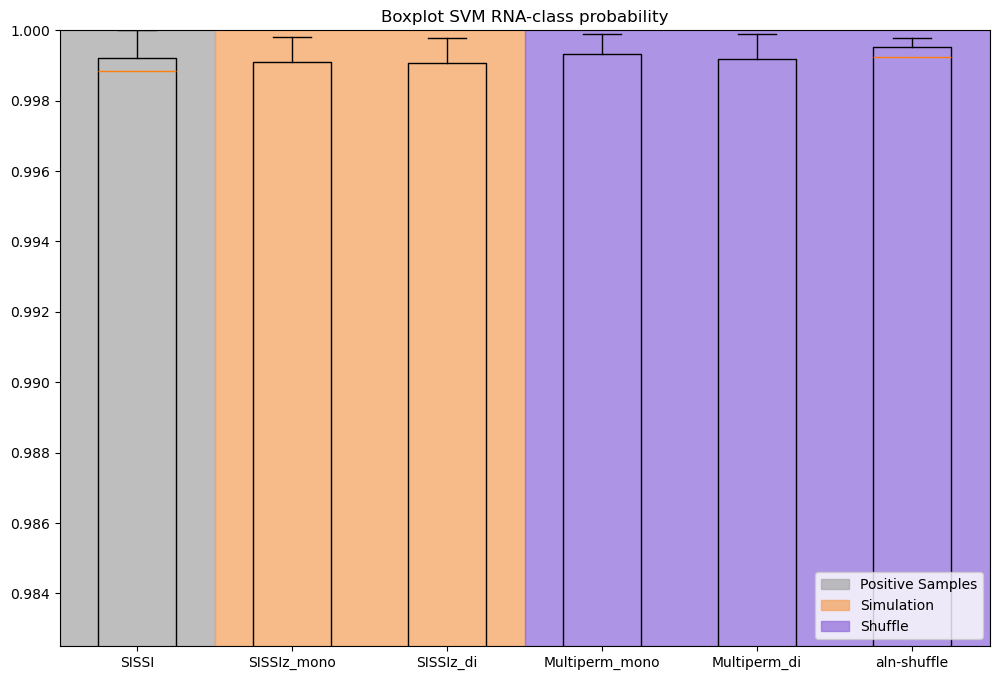

In [16]:
dataframes = [new_df_native, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['SVM RNA-class probability'] for df in dataframes]
thresholds = [0.9]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

plt.ylim(0.9825, 1.0)
plt.title('Boxplot SVM RNA-class probability')
plt.legend()
plt.show()

## Structure conservation index (SCI)

C:\Users\Stefan\AppData\Local\Temp\ipykernel_8188\2489862925.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


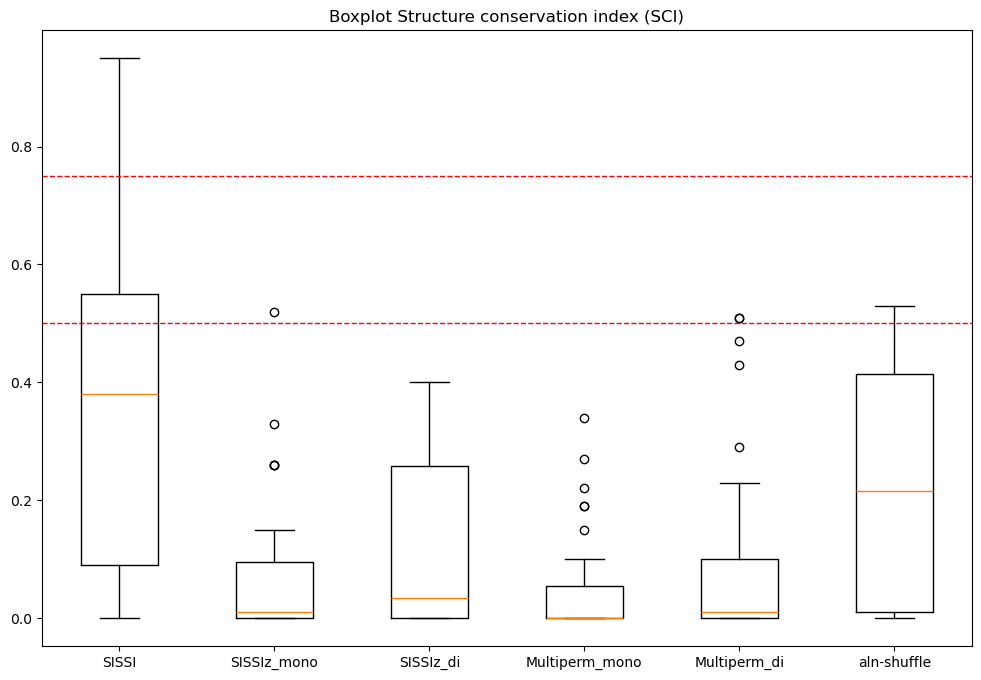

In [17]:
dataframes = [new_df_native, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Structure conservation index'] for df in dataframes]
thresholds = [0.5, 0.75]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Structure conservation index (SCI)')
plt.show()


## Mean z-score

C:\Users\Stefan\AppData\Local\Temp\ipykernel_8188\2003586853.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


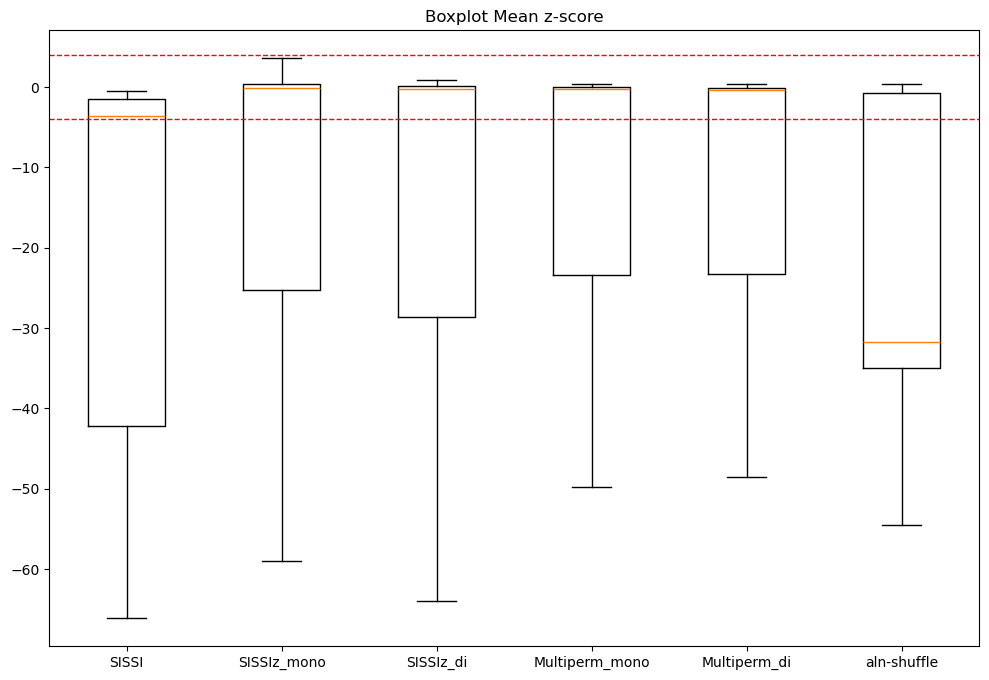

In [18]:
dataframes = [new_df_native, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Mean z-score'] for df in dataframes]
thresholds = [-4, 4]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Mean z-score')
plt.show()

## Consensus MFE

C:\Users\Stefan\AppData\Local\Temp\ipykernel_8188\1968430146.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


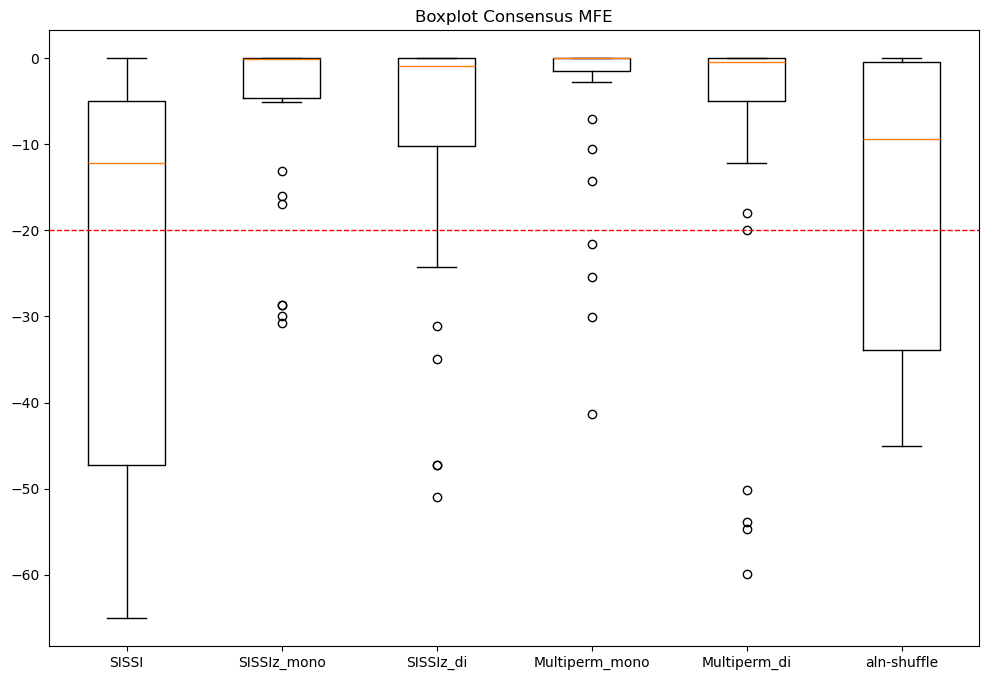

In [19]:
dataframes = [new_df_native, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Consensus MFE'] for df in dataframes]
thresholds = [-20]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.title('Boxplot Consensus MFE')
plt.show()

## Mean pairwise identity

C:\Users\Stefan\AppData\Local\Temp\ipykernel_8188\196431454.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


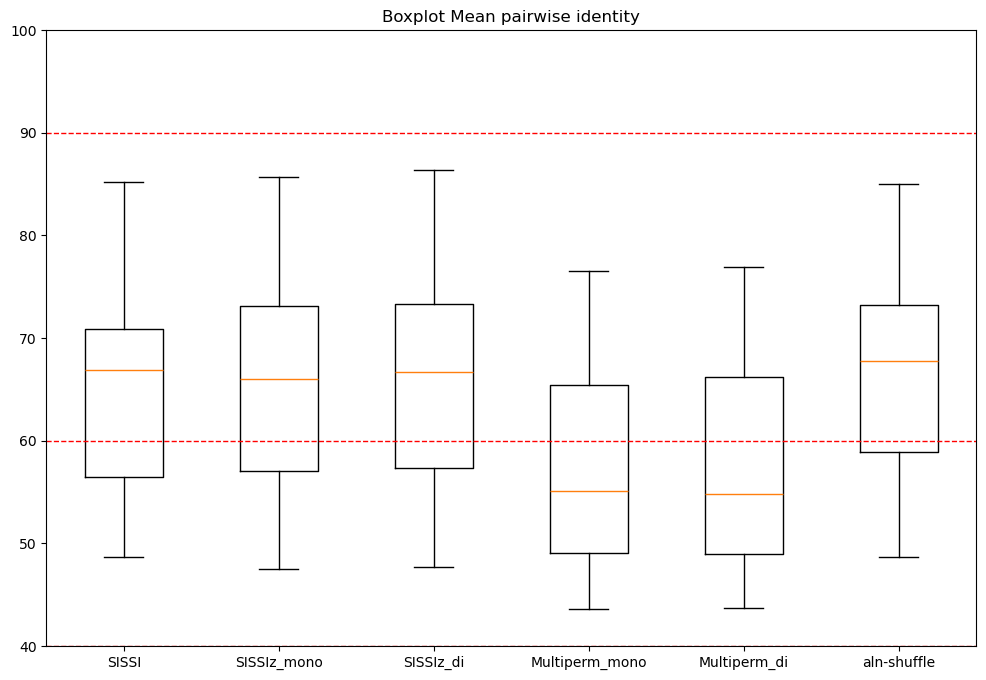

In [20]:
dataframes = [new_df_native, new_df_sissiz_mono, new_df_sissiz_di, new_df_multiperm_mono, new_df_multiperm_di, new_df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
data = [df['Mean pairwise identity'] for df in dataframes]
thresholds = [40, 60, 90]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

plt.ylim(40, 100)
plt.title('Boxplot Mean pairwise identity')
plt.show()

## Confusion Matrix and Roc-Curve

In [21]:
# def confusionMatrixAndRocCurve(data):
#     threshold = -3
#     data_X = data.drop(columns=["z-score calculated from 7. 8. and 9.", "File"])
#     data_y = (data['z-score calculated from 7. 8. and 9.'] > threshold).astype(int)

#     X_train, X_test, y_train, y_test = train_test_split(data_X, data_y , test_size=0.3, random_state=42)

#     model = LogisticRegression() 
#     model.fit(X_train, y_train) 
#     y_pred_proba = model.predict_proba(X_test)[:, 1] 
#     y_pred = (y_pred_proba >= 0.5).astype(int)

#     accuracy = accuracy_score(y_test, y_pred)
#     class_report = classification_report(y_test, y_pred)

#     print(accuracy)
#     print(class_report)
    
#     conf_matrix = metrics.confusion_matrix(y_test, y_pred)
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])

#     cm_display.plot()
#     plt.show() 

#     fpr, tpr, thresholds = roc_curve(y_test, y_pred) 

#     print(fpr)
#     print(tpr)
#     roc_auc = auc(fpr, tpr)

#     # Plot the ROC curve
#     plt.figure()  
#     plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve for ...')
#     plt.legend()
#     plt.show()